# **Investigating Predictors of Heart Disease**
done by Group 10 - Arnav, Drishti, Karan and Samia 

### Introduction:

Heart disease is a leading cause of mortality worldwide, making it a significant public health concern.
Understanding the factors associated with heart disease occurrence is crucial for prevention and intervention efforts. In our project, we aim to explore the predictors of heart disease using a dataset containing various patient attributes and heart disease diagnosis outcomes (Kreatsoulas, C., & Anand, S. S., 2010).

The central question guiding our analysis is: *Can factors like age, cholosteral levels, and heart rate be used to predict if a patient has heart disease?*

### Dataset Description:
We will utilize the "Heart Disease" dataset, which includes patient demographic information, clinical attributes, and a binary target variable indicating the presence or absence of heart disease. 
The dataset is sourced from a reliable repository and has been widely used for cardiovascular research.
The dataset comprises 76 attributes, with most studies centered on a subset of 14 attributes. Primarily sourced from the Cleveland database, extensively utilized by machine learning (ML) researchers, it aims to predict the presence of heart disease. The "goal" field denotes heart disease presence, ranging from 0 (absence) to 4.  
(Janosi, Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert, 1988)

The relevant columns in this spreadsheet are: 
1. **age**: age
2. **sex**: sex (1 = male, 0 = female)
3. **cp**: chest pain type
4. **trestbps**: resting blood pressure in mmHg
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **restecg**: resting electrocardiographic results
8. **thalach**: maximum heart rate achieved
9. **exang**: whether exercise induced angina (1 = True, 0 = False)
10. **oldpeak**: ST depression induced by exercise, relative to rest
11. **slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **num**: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)



### Preliminary Exploratory Data Analysis:

We will programmatically access and import the "Heart Disease" dataset into our Jupyter Notebook to ensure reproducibility.

After having loaded the data into Jupyter, steps to tidy the data will be taken. Data cleaning and wrangling steps will be perfromed including handling missing values and encoding categorical variables as necessary.

Summary statistics will be calculated to understand the distribution of variables and identify potential trends.

Visualizations, such as scatterplots, will be generated to explore relationships between variables and gain insights into the data.

In [6]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [39]:
#reading the data
heart_data <- read_csv("processed.cleveland.data",
                       col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                         "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

print("                                       HEART DISEASE DATA SET                   ")
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "                                       HEART DISEASE DATA SET                   "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


 #### Tidying the data
- In the dataset description, several variables including 'sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'ca', and 'slope' are identified as categorical. Utilizing the mutate function in combination with as.factor(), these variables are converted into categorical types.- 
Cleaning of the data involves converting missing values denoted as "?" to NA. Moreover, the variable "sex" containing values 0 and 1 is transformed into "male" and "female" respectively for enhanced readability
- 
For a clearer interpretation of the variable "num", its description indicates that values 1 through 4 denote the presence of heart disease, while 0 signifies absence. To facilitate analysis, a new variable is created using the ifelse() function to discern the presence or absence of heart disease based on the values of the "num" variable. 

In [40]:
#categorical variables
heart_newdata <- heart_data |>
                    mutate(sex = as.factor(sex), cp = as.factor(cp), 
                           fbs = as.factor(fbs), restecg = as.factor(restecg),
                           exang = as.factor(exang), thal = as.factor(thal),
                           ca = as.factor(ca), slope = as.factor(slope))
#missing values
heart_newdata[ heart_newdata == "?" ] <- NA

heart_newdata <- heart_newdata|> 
                mutate(heart_disease_status = ifelse(num == 0, 'absent', 'present'))|>
                mutate(sex = ifelse(sex == 1, 'male', 'female')) 

print("                                   HEART DISEASE TIDY DATA                     ")
heart_newdata

[1] "                                   HEART DISEASE TIDY DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,absent
67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,present
67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,present
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,present
57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,present
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,0,absent


We used initial_split() to split our dataframe into 75% training and 25% testing data. Only the training data has been used for analysis.

In [36]:
#splitting the dataframe into training and testing data
heart_split <- initial_split(heart_newdata, prop = 3/4, strata = num)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

print("                                           TRAINING DATA                     ")
head(heart_training)
print("                                           TESTING DATA                     ")
head(heart_testing)

[1] "                                           TRAINING DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,absent
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,absent
41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,absent
56,male,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,absent
57,female,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,absent
57,male,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0,absent


[1] "                                           TESTING DATA                     "


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<chr>
62,female,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,present
63,male,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,present
52,male,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0,absent
57,male,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0,absent
48,male,2,110,229,0,0,168,0,1.0,3,0.0,7.0,1,present
49,male,2,130,266,0,0,171,0,0.6,1,0.0,3.0,0,absent


The data has been summarized, to see the average values of variables (non-factor) like age, trestbps, chol, thalach and find the total number of patients. 

In [32]:
#summarizing the data
heart_summarized <- heart_training |>
                    group_by(heart_disease_status) |>
                    summarize(no_of_patients = n(),avg_age = mean(age), avg_trestbps = mean(trestbps), avg_chol = mean(chol),
                              avg_thalach = mean(thalach))

print("                         SUMMARIZED DATA                      ")
heart_summarized 

[1] "                         SUMMARIZED DATA                      "


heart_disease_status,no_of_patients,avg_age,avg_trestbps,avg_chol,avg_thalach
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
absent,123,53.02439,129.3496,241.5610,158.2764
present,102,56.53922,133.5882,251.6961,139.3039


#### Visualizing the data
We have plotted different non-categorical variables with each other to see potential trends.

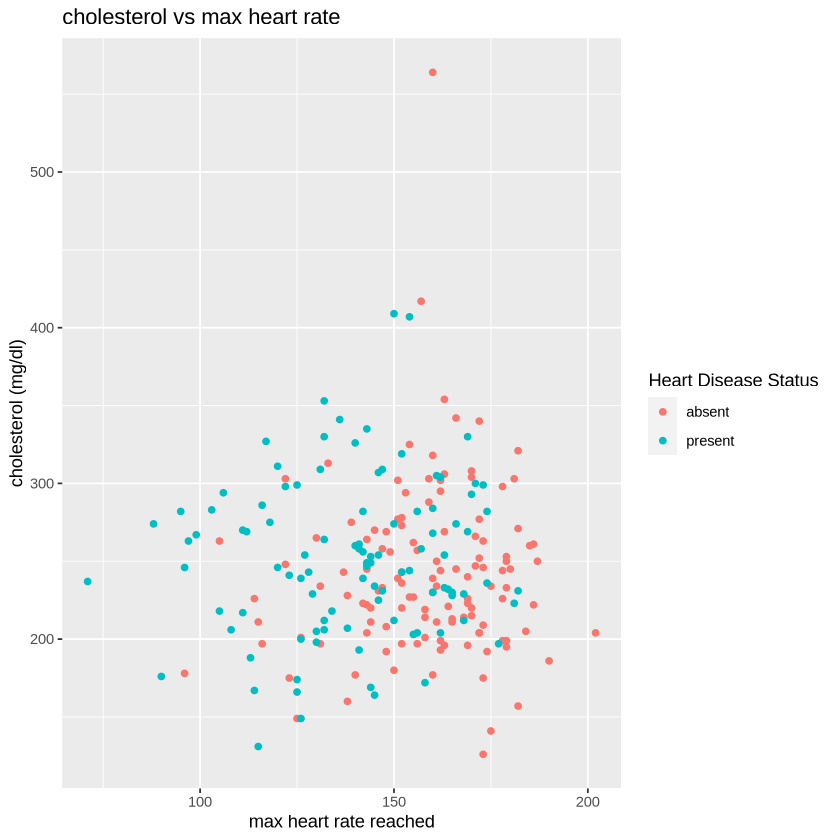

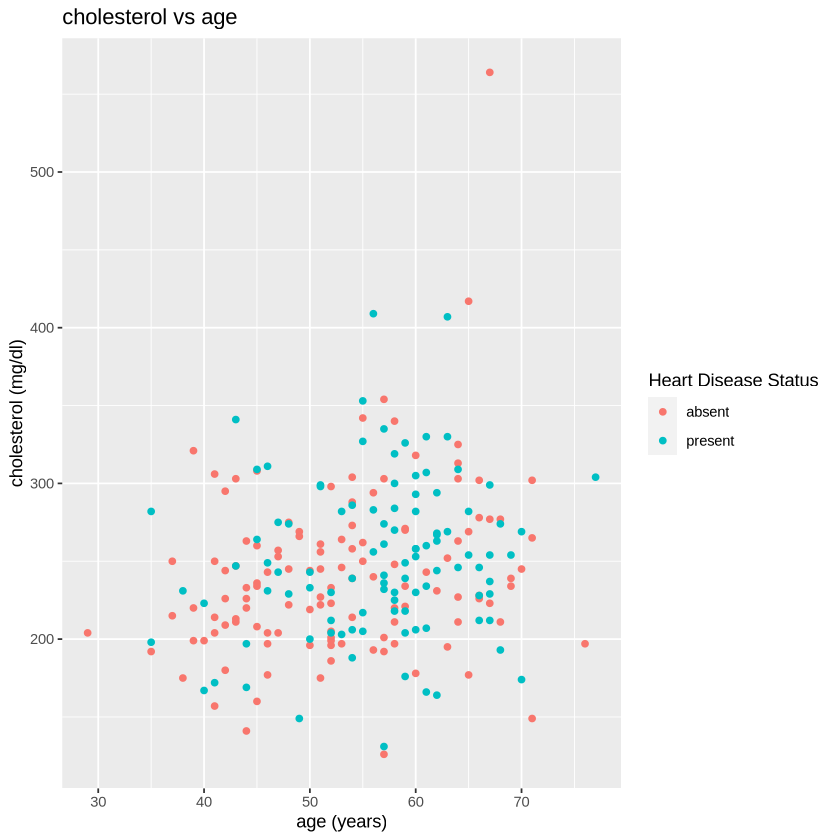

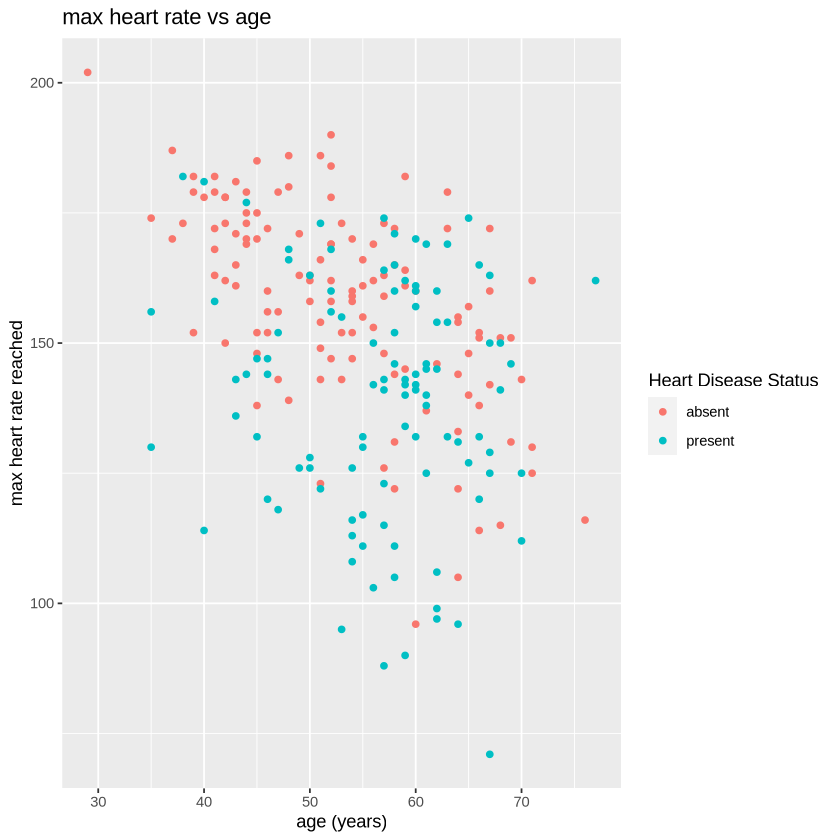

In [19]:
#cholesterol vs max heart rate
heart_dataplot1 <- ggplot(heart_training, aes(x = thalach, y = chol, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)", 
                      color = "Heart Disease Status") + ggtitle("cholesterol vs max heart rate") 
heart_dataplot1
#cholesterol vs age
heart_dataplot2 <- ggplot(heart_training, aes(x = age, y = chol, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "age (years)", y = "cholesterol (mg/dl)", 
                      color = "Heart Disease Status") + ggtitle("cholesterol vs age")
heart_dataplot2
#max heart rate vs age
heart_dataplot3 <- ggplot(heart_training, aes(x = age, y = thalach, color = heart_disease_status)) +
                 geom_point() +
                 labs(x = "age (years)", y = "max heart rate reached", 
                      color = "Heart Disease Status") + ggtitle("max heart rate vs age")
heart_dataplot3

#### Brief Description on each plot: 
- heart_dataplot1: We have plotted the non-factor variable cholesterol vs max heart-rate of patients. We can see a slightly more scattered data for people with heart disease compared to people without heart disease.
  
- heart_dataplot2: We have plotted the non-factor variable cholesterol vs age heart-rate of patients. There doesn't seem to be that big of a difference when you compare the patienst with and without heart disease but it can be said that people with heart disease have a slightly higher cholesterol levels.
  
- heart_dataplot3: We have plotted the non-factor variable max heart rate vs age heart-rate of patients. There is definitely a pattern that can noticed, people with heart disease have a lower maximum heart rate achieved than people without heart disease.

We can see that there are some potential trends demonstrated by age, cholestrol, resting heart rate and maximum heart rate that we can analyze futher.

### Methods:
- For our data analysis, we will primarily utilize a K-Nearest-Neighbor (KNN) classification algorithm to predict the presence of heart disease. The variables/columns we will use for prediction include age, cholesterol levels, resting blood pressure and maximum heart rate. These variables were selected based on their clinical relevance in diagnosing heart disease. 
- To visualize the results, we will create scatter plots of the selected predictors against the target variable (presence of heart disease) to observe their relationships. This will provide insight into how each predictor influences the likelihood of heart disease.

### Expected Outcomes and Significance:
Expected Findings:
We expect to find important factors that relate to whether someone has heart disease or not. This will help doctors and policymakers understand the disease better. We also think we'll make a model that can predict if someone has heart disease accurately. We'll use things like cholesterol levels, heart rate, and age to make this prediction. We believe people with heart disease will show different patterns in these things compared to those without the disease. This will help us tell who has the disease and who doesn't more easily.

Impact of Findings:
Our study's results could make a big difference in how doctors treat patients and how we handle public health. If we can predict heart disease accurately, doctors can start treatment sooner, which might stop the disease from getting worse and help patients get better faster. Also, this model could help hospitals and clinics use their resources better by focusing on people who are most likely to have heart disease and need more help.

Future Questions:
Once we have our results, we might want to look into other questions. For example, we might want to see if certain lifestyle changes can lower the risk of heart disease. We might also want to check if different groups of people have different chances of getting heart disease. Overall, finding a good way to predict heart disease could change how we diagnose and preveleading to better outcomes for patients and less strain on healthcare system.ystems


### References

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Centers for Disease Control and Prevention. (2023, May 15). About heart disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/about.htm 

AHA names top advances in Cardiovascular Disease Research for 2022. www.heart.org. (2024, January 9). https://www.heart.org/en/around-the-aha/top-cardiovascular-research-advances-of-2022 

Healthcare industries generate enormous amount of data. (2020, July 1). Heart disease prediction using exploratory data analysis. Procedia Computer Science. https://www.sciencedirect.com/science/article/pii/S1877050920315210 

Kreatsoulas, C., & Anand, S. S. (2010). The impact of social determinants on cardiovascular disease. The Canadian journal of cardiology, 26 Suppl C(Suppl C), 8C–13C. https://doi.org/10.1016/s0828-282x(10)71075-8

Centers for Disease Control and Prevention. (2023a, March 21). Know your risk for heart disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm 